In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [114]:
data = pd.read_csv('./train.csv')

In [115]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [116]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [117]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [118]:
data.fillna(0, inplace=True)

In [119]:
data['Sex'] = [1 if x == 'male' else 0 for x in data.Sex]

In [120]:
# 独热编码 防止数据产生线性关系
data['p1'] = np.array(data['Pclass'] == 1).astype(np.int32)
data['p2'] = np.array(data['Pclass'] == 2).astype(np.int32)
data['p3'] = np.array(data['Pclass'] == 3).astype(np.int32)

In [121]:
del data['Pclass']

In [122]:
data.Embarked.unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [123]:
data['e1'] = np.array(data['Embarked'] == 'S').astype(np.int32)
data['e2'] = np.array(data['Embarked'] == 'C').astype(np.int32)
data['e3'] = np.array(data['Embarked'] == 'Q').astype(np.int32)

In [124]:
del data['Embarked']

In [125]:
data.values.dtype

dtype('float64')

In [126]:
data_train = data[[x for x in data.columns if x != 'Survived']].values

In [127]:
data_target = data['Survived'].values.reshape(len(data), 1)

In [128]:
np.shape(data_train), np.shape(data_target)

((891, 11), (891, 1))

In [129]:
x_train, x_test, y_train, y_test = train_test_split(data_train, data_target, test_size=0.2)

In [130]:
x_train.shape, x_test.shape

((712, 11), (179, 11))

In [131]:
model = DecisionTreeClassifier()


In [132]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [133]:
model.score(x_test, y_test)

0.7821229050279329

In [134]:
model.score(x_train, y_train)

0.9859550561797753

In [135]:
def m_score(depth):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return train_score, test_score

In [136]:
depths = range(2, 15)
scores = [m_score(depth) for depth in depths]

In [137]:
train_s = [s[0] for s in scores]
test_s = [s[1] for s in scores]

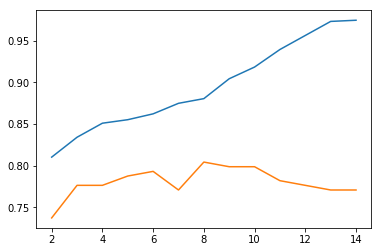

In [138]:
plt.plot(depths, train_s)
plt.plot(depths, test_s)

In [139]:
def m_score(value):
    model = DecisionTreeClassifier(min_impurity_split=value)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return train_score, test_score

In [140]:
values = np.linspace(0, 0.5, 50)

In [141]:
scores = [m_score(value) for value in values]

/usr/local/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_spli

In [142]:
train_s = [s[0] for s in scores]
test_s = [s[1] for s in scores]

In [143]:
best_index = np.argmax(test_s)

In [144]:
best_score = test_s[best_index]

In [145]:
best_value = values[best_index]

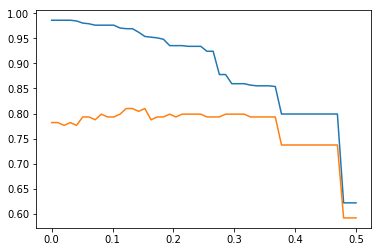

In [146]:
plt.plot(values, train_s)
plt.plot(values, test_s)

如何选择多个数据的最佳值

交叉验证为了解决数据划分存在随机性

In [147]:
values = np.linspace(0, 0.5, 50)

In [148]:
depths = range(2, 15)

In [149]:
param_grid = {'max_depth': depths, 'min_impurity_split': values}

In [150]:
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [151]:
model.fit(data_train, data_target)

/usr/local/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_spli

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 15), 'min_impurity_split': array([0.     , 0.0102 , 0.02041, 0.03061, 0.04082, 0.05102, 0.06122,
       0.07143, 0.08163, 0.09184, 0.10204, 0.11224, 0.12245, 0.13265,
       0.14286, 0.15306, 0.16327, 0.17347, 0.18367, 0.19388, 0.20408,
       0.21429, 0.22449, 0.23...16, 0.41837,
       0.42857, 0.43878, 0.44898, 0.45918, 0.46939, 0.47959, 0.4898 ,
       0.5    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [152]:
model.best_params_

{'max_depth': 9, 'min_impurity_split': 0.21428571428571427}

{'max_depth': 9, 'min_impurity_split': 0.21428571428571427}

In [153]:
model.best_score_

0.8305274971941639

0.8327721661054994